In [1]:
from data import *

## 使用全连接神经网络进行房价回归

In [2]:
import keras
import tensorflow as tf
print(keras.__version__)
print(tf.__version__)
import matplotlib.pyplot as plt

Using TensorFlow backend.


2.2.4
1.12.0


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor

def create_model():
    model=Sequential()
    model.add(Dense(10,input_dim=X_train.shape[1],activation='relu'))
    model.add(Dense(300,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam',loss='mean_squared_error')
    return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                3050      
_________________________________________________________________
dense_2 (Dense)              (None, 300)               3300      
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                15050     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 21,451
Trainable params: 21,451
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_

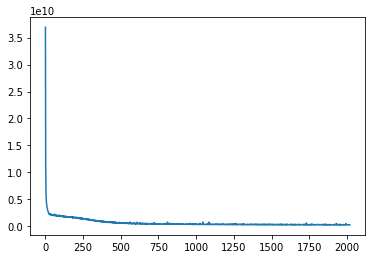

In [4]:
model = create_model()
model.summary()
history=model.fit(X_train,y_train,
                  epochs=2020,batch_size=32,verbose=0)
model.summary()
benchmark1(model, X_test, y_test)
plt.plot(history.history['loss'])

RMSE: 45.68071175795739
LRMSE: 0.26751841560055295


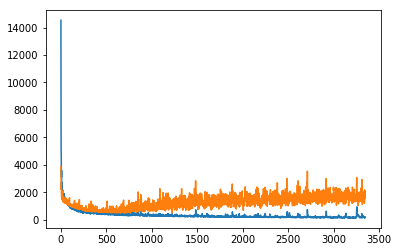

In [11]:
model=create_model()
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),
                  epochs=3350,batch_size=100,verbose=0)

benchmark1(model,X_test,y_test)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

RMSE: 26362.581576579374
LRMSE: 0.13787579498900965


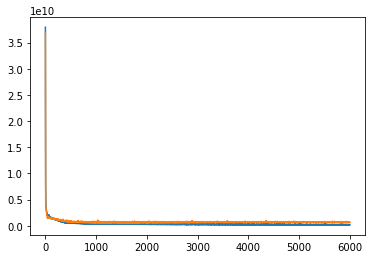

In [6]:
model=create_model()
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),
                  epochs=6000,batch_size=64,verbose=0)

benchmark1(model,X_test,y_test)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

作业：

调整神经网络的参数

层数

神经元的个数

训练的epoch

dropout

SGD降低学习率的方法(100 epoch 0.1,101~200 0.01 201~300 0.001)

In [8]:
y_test = y_test / 1000
y_train = y_train / 1000

RMSE: 51.05479799563566
LRMSE: 0.2729848623432088


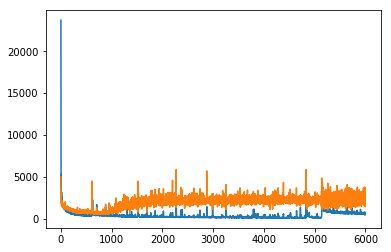

In [10]:
model=create_model()
y_train
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),
                  epochs=6000,batch_size=64,verbose=0)

benchmark1(model,X_test,y_test)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
from sklearn.model_selection import GridSearchCV
model = KerasRegressor(build_fn=create_model)
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [1000, 2500, 5000, 7500]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))